In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Chile'
raceDate = '26-29/10/2023'
surface = 'Tarmac'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/80244-central-european-rally-2023/?s='
startat, no_ss=434140, int(18)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#8,Tänak Ott - Jä,RC1,1:51.2,-,82.6,1,Chile,26-29/10/2023,Tarmac,Wrc,1
1,2,#17,Ogier Sébastie,RC1,1:51.9,+0.7 +0.7,82.0 0.27,1,Chile,26-29/10/2023,Tarmac,Wrc,2
2,3,#11,Neuville Thier,RC1,1:52.2,+1.0 +0.3,81.8 0.39,1,Chile,26-29/10/2023,Tarmac,Wrc,3
3,4,#4,Lappi Esapekka,RC1,1:52.8,+1.6 +0.6,81.4 0.63,1,Chile,26-29/10/2023,Tarmac,Wrc,4
4,5,#3,Suninen Teemu,RC1,1:53.6,+2.4 +0.8,80.8 0.94,1,Chile,26-29/10/2023,Tarmac,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,50,#54,Vossen Henk -,RC2,12:03.4,+3:21.1 +0.4,81.5 12.3,18,Chile,26-29/10/2023,Tarmac,Wrc,50
50,51,#79,Pahlitzsch Tho,RC4,12:16.2,+3:33.9 +12.8,80.0 13.1,18,Chile,26-29/10/2023,Tarmac,Wrc,51
51,52,#52,Díaz-Aboitiz M,RC2,13:22.3,+4:40.0 +1:06.1,73.5 17.1,18,Chile,26-29/10/2023,Tarmac,Wrc,52
52,53,#80,Stejskal Václa,RC5,17:05.2,+8:22.9 +3:42.9,57.5 30.7,18,Chile,26-29/10/2023,Tarmac,Wrc,53


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tänak Ott - Jä,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,1,111.2
1,Ogier Sébastie,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,2,111.9
2,Neuville Thier,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,3,112.2
3,Lappi Esapekka,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,4,112.8
4,Suninen Teemu,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,5,113.6
...,...,...,...,...,...,...,...,...,...
49,Vossen Henk -,RC2,18,Chile,26-29/10/2023,Tarmac,Wrc,50,723.4
50,Pahlitzsch Tho,RC4,18,Chile,26-29/10/2023,Tarmac,Wrc,51,736.2
51,Díaz-Aboitiz M,RC2,18,Chile,26-29/10/2023,Tarmac,Wrc,52,802.3
52,Stejskal Václa,RC5,18,Chile,26-29/10/2023,Tarmac,Wrc,53,1025.2


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race  ss Gr/Cl             
Chile 1  RC1          111.2
         RC2          115.0
         RC3          125.8
         RC4          129.7
         RC5          150.6
...                     ...
      18 RC2          553.5
         RC3          604.7
         RC4          615.2
         RC5         1025.2
         RGT          668.5

[108 rows x 1 columns]

In [11]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tänak Ott - Jä,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,1,111.2,111.2,111.2,0.0,0.0,0.000000,01
1,Ogier Sébastie,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,2,111.9,111.2,111.2,0.7,0.7,0.629496,01
2,Neuville Thier,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,3,112.2,111.2,111.2,1.0,1.0,0.899281,01
3,Lappi Esapekka,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,4,112.8,111.2,111.2,1.6,1.6,1.438849,01
4,Suninen Teemu,RC1,1,Chile,26-29/10/2023,Tarmac,Wrc,5,113.6,111.2,111.2,2.4,2.4,2.158273,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,Rada Martin -,RGT,18,Chile,26-29/10/2023,Tarmac,Wrc,42,668.5,668.5,522.3,146.2,0.0,0.000000,18
1061,Nešetřil Petr,RGT,18,Chile,26-29/10/2023,Tarmac,Wrc,43,674.7,668.5,522.3,152.4,6.2,0.927450,18
1062,Fumal Armand -,RGT,18,Chile,26-29/10/2023,Tarmac,Wrc,49,723.0,668.5,522.3,200.7,54.5,8.152580,18
1063,Stejskal Václa,RC5,18,Chile,26-29/10/2023,Tarmac,Wrc,53,1025.2,1025.2,522.3,502.9,0.0,0.000000,18


In [12]:
Group = 'RC1'
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['RC1', 'RC2']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2.csv')

In [13]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18
Crew,,,,,,,,,,,,,,,,,,
Evans Elfyn -,3.9,7.8,3.4,14.6,6.4,0.0,9.7,11.1,0.0,3.8,NaN,NaN,NaN,NaN,1.8,0.0,9.7,0.0
Katsuta Takamo,3.4,7.7,18.9,25.8,28.6,13.7,26.4,32.0,13.7,25.6,7.3,4.9,8.4,4.4,5.4,6.6,3.3,6.2
Lappi Esapekka,1.6,3.0,1.8,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loubet Pierre-,4.4,7.0,18.4,30.9,37.9,NaN,30.7,303.1,11.7,16.9,9.3,9.0,19.7,25.1,9.3,39.3,71.1,79.9
Munster Grégoi,2.8,13.2,15.3,32.0,34.7,NaN,34.1,45.2,19.8,18.3,4.6,17.2,19.0,17.4,14.1,14.1,11.8,11.2
Neuville Thier,1.0,0.0,4.5,19.5,12.0,1.1,8.0,0.0,1.3,0.0,0.0,1.5,3.5,0.5,3.2,10.8,3.6,3.5
Ogier Sébastie,0.7,6.1,41.9,41.4,21.2,13.3,24.2,16.8,4.3,10.6,3.2,0.0,0.0,9.4,0.0,4.6,0.0,4.9
Rovanperä Kall,4.0,2.9,0.0,0.0,0.0,1.7,0.0,1.1,2.1,24.7,22.0,4.9,15.7,0.0,7.4,18.2,9.7,17.2
Suninen Teemu,2.4,6.9,21.6,28.7,30.7,NaN,33.9,26.8,10.8,18.9,2.3,13.2,10.3,7.4,3.3,7.6,8.9,8.8


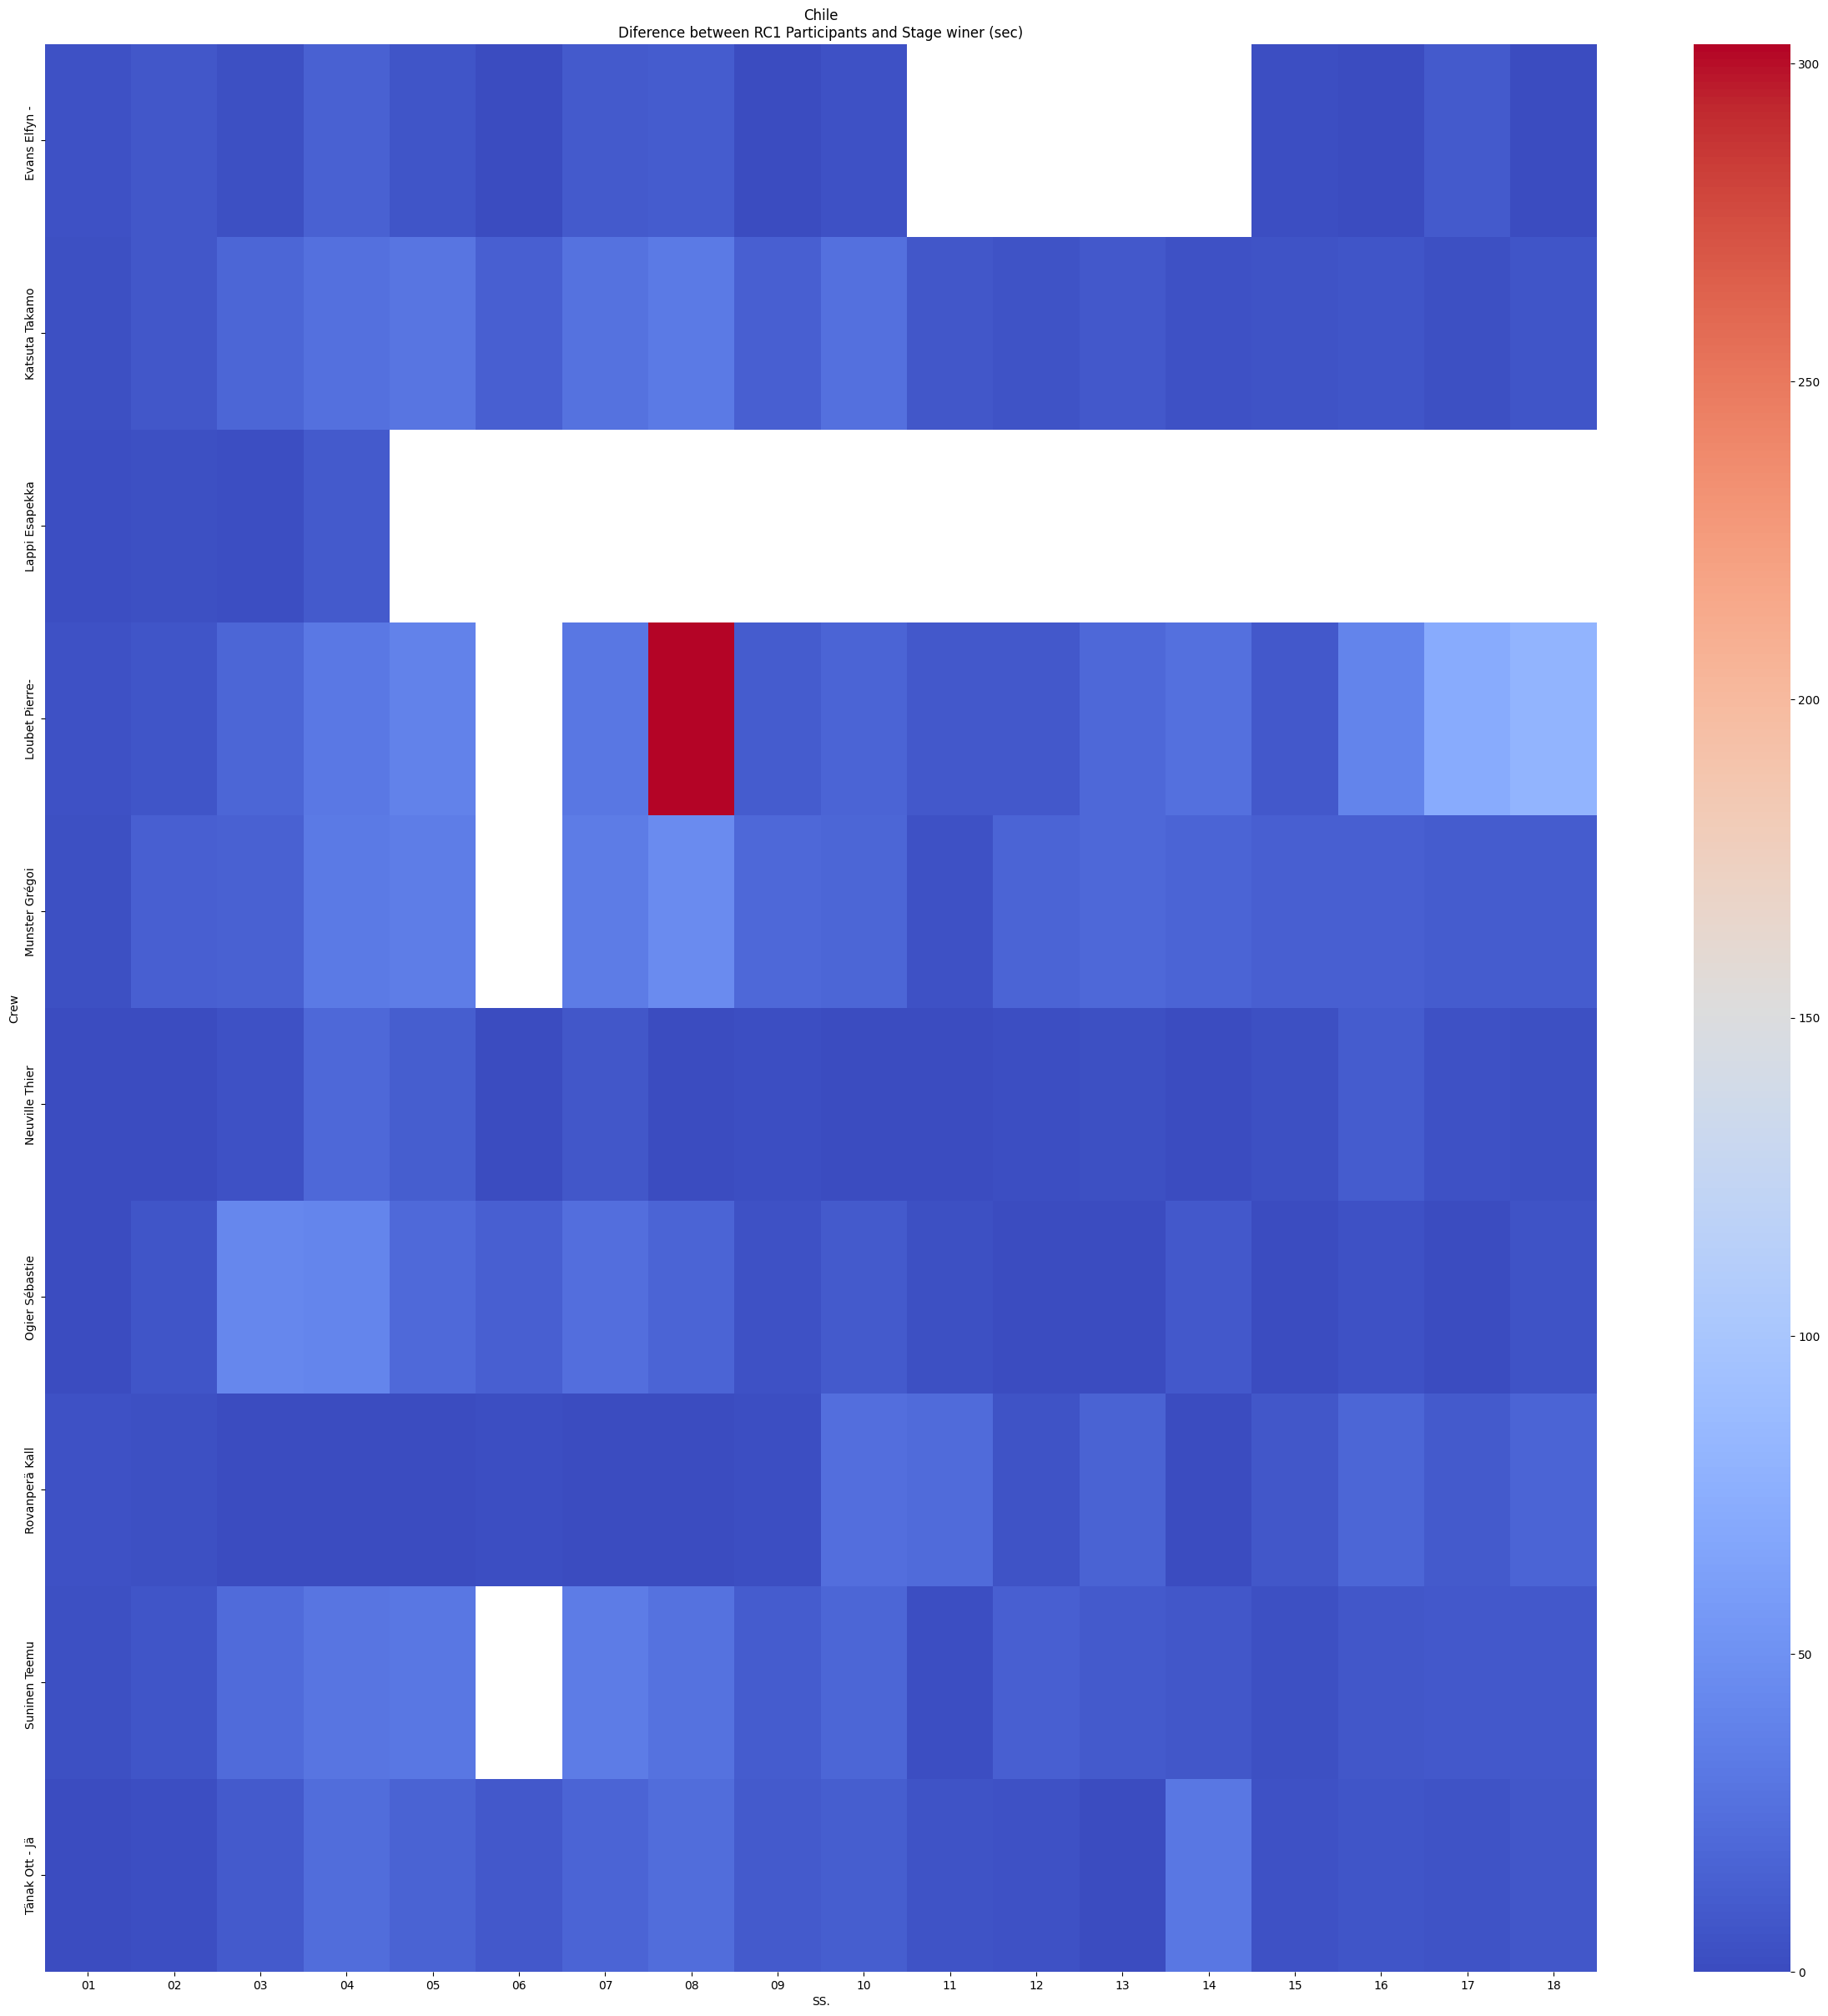

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

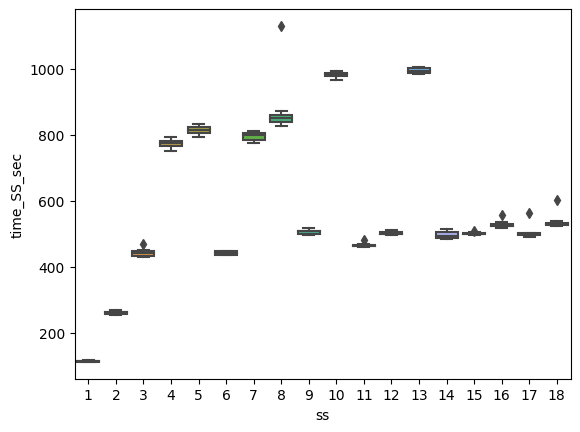

In [15]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")

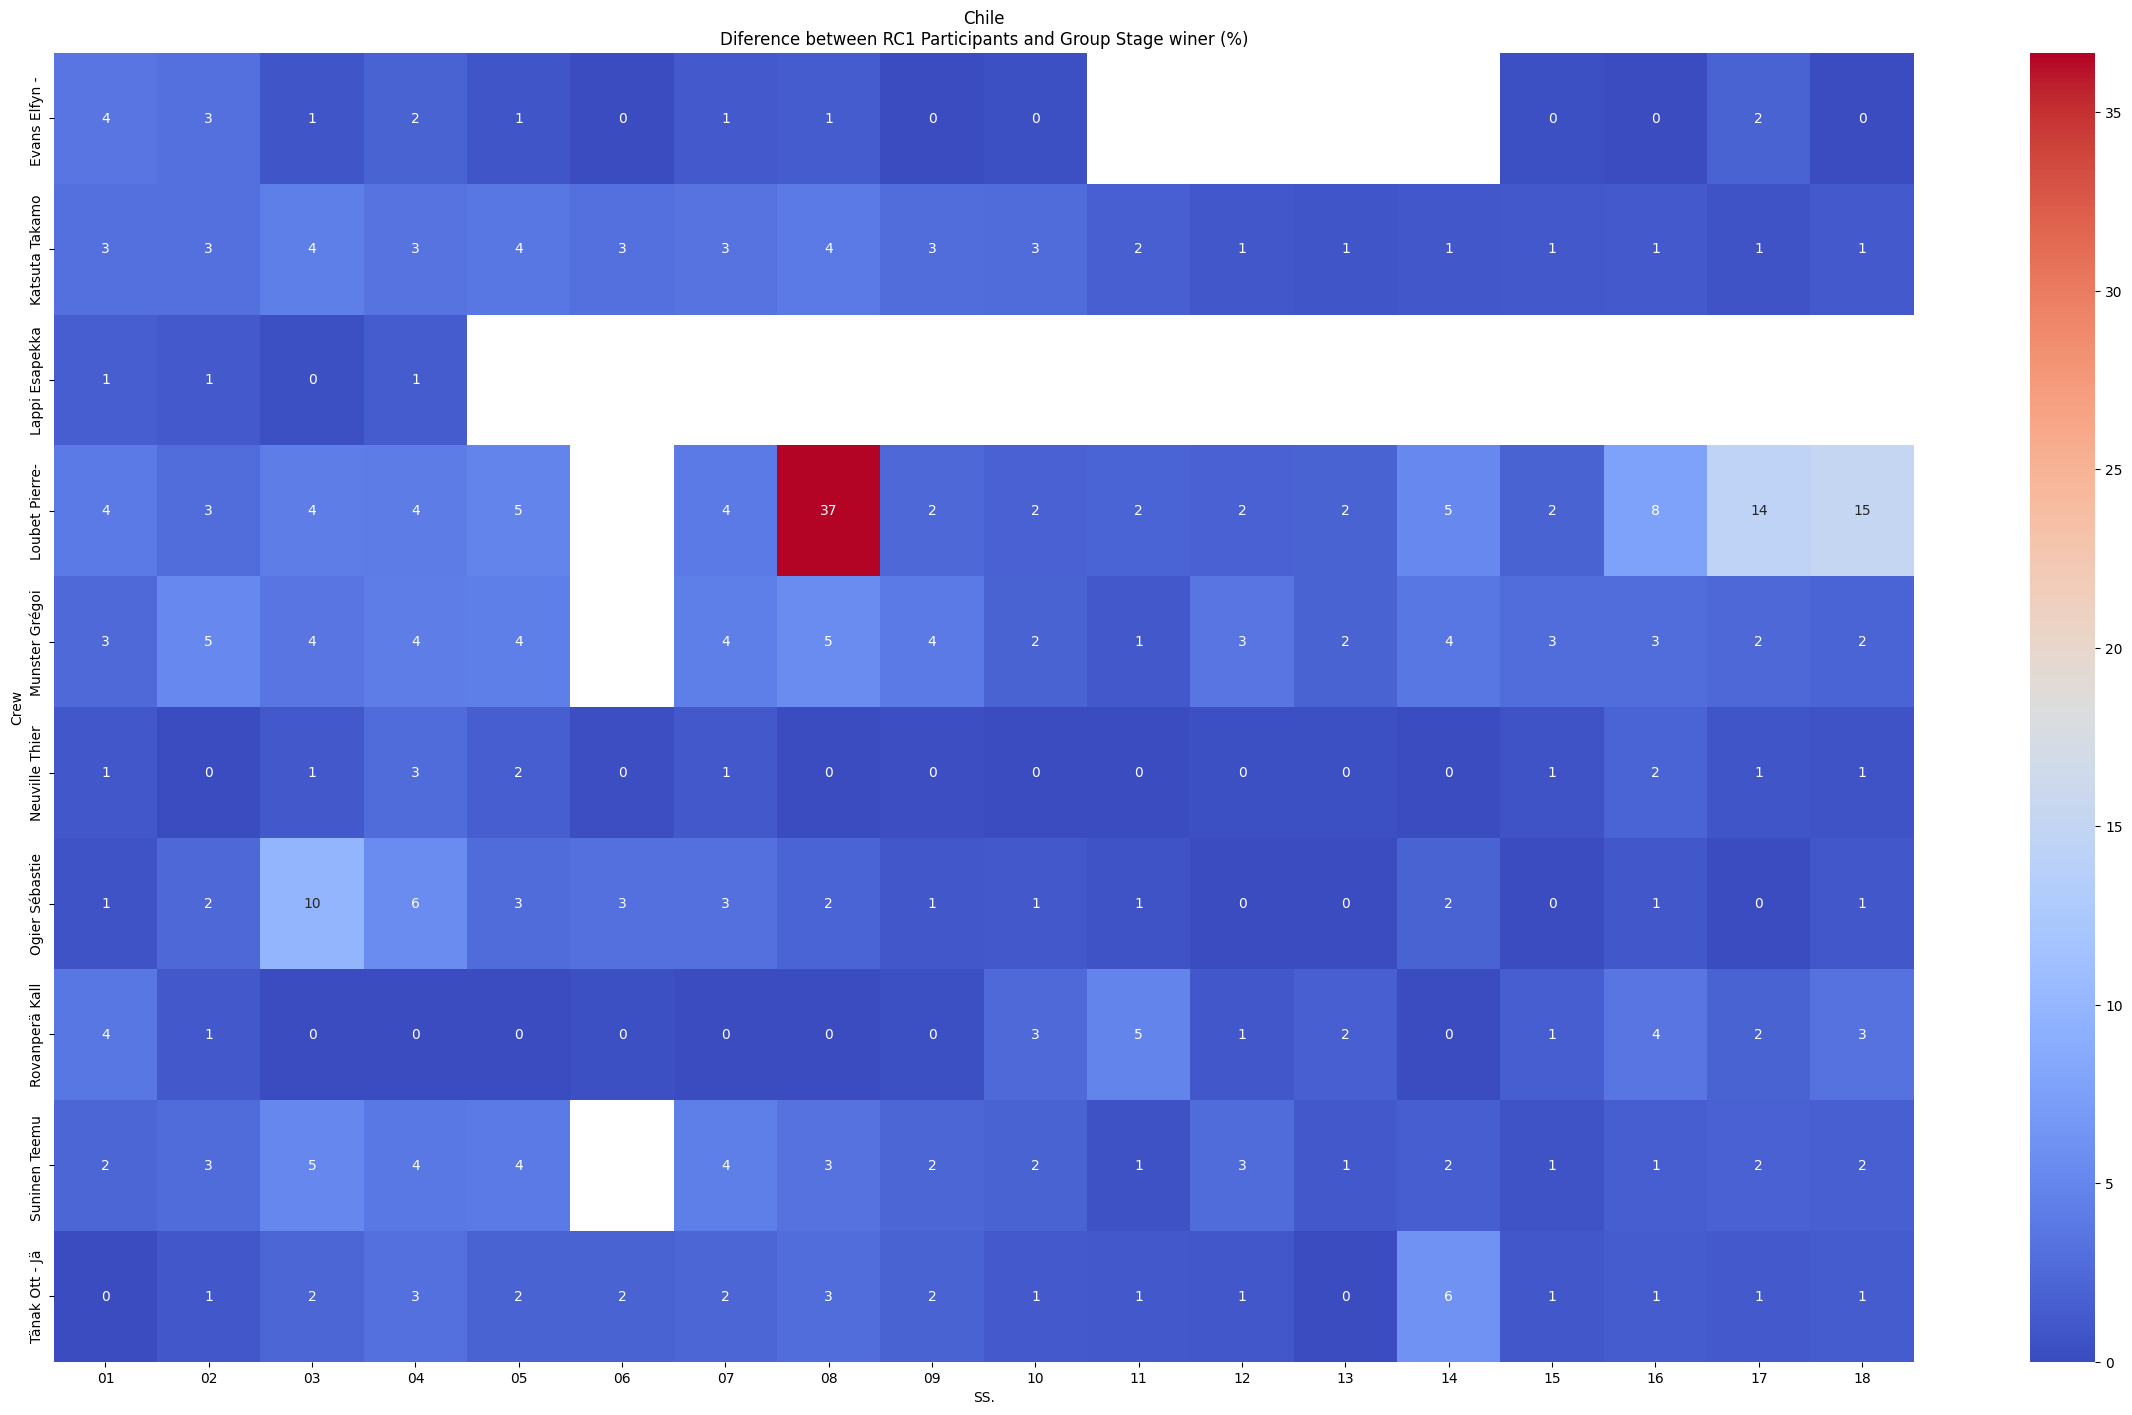

In [16]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
#plt.savefig(rallyname + Group + ".jpg")
plt.show()